<a href="https://colab.research.google.com/github/FerryJulyo/LinearRegression_T.DATA/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [4]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
game = pd.read_csv('/content/drive/MyDrive/TData/Video_Games_Sales_as_at_22_Dec_2016.csv')
game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Shape of our dataset
game.shape

# Info our dataset
game.info()

# Describe our dataset
game.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


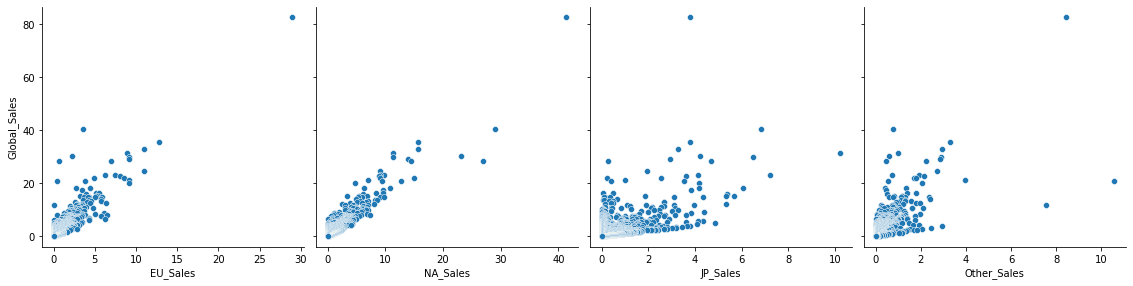

In [29]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(game, x_vars=['EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales'], 
             y_vars='Global_Sales', size=4, aspect=1, kind='scatter')
plt.show()

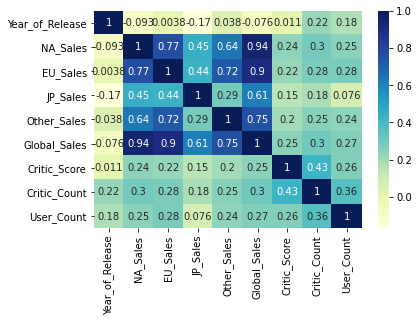

In [28]:
sns.heatmap(game.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [30]:
# Creating X and y
X = game['NA_Sales'] 
y = game['Global_Sales']

# Splitting the varaibles as training and testing from sklearn.model_selectio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size = 0.3, random_state = 100)

# Take a look at the train dataset X_train
y_train

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


const       0.057753
NA_Sales    1.800577
dtype: float64

In [35]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 8.669e+04
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:04:21   Log-Likelihood:                -9290.8
No. Observations:               11703   AIC:                         1.859e+04
Df Residuals:                   11701   BIC:                         1.860e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0578      0.005     11.118      0.000       0.048       0.068
NA_Sales       1.8006      0.006    294.434      0.000       1.789       1.813
==============================================================================
Omnibus:                     5761.656   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39248090.499
Skew:                           0.418   Prob(JB):                         0.00
Kurtosis:                     286.703   Cond. No.                         1.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

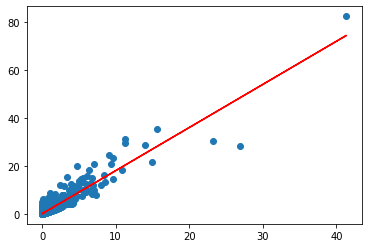

In [37]:
# Visualizing the regression line 
plt.scatter(X_train, y_train) 
plt.plot(X_train, 0.0578 + 1.8006*X_train, 'r') 
plt.show()

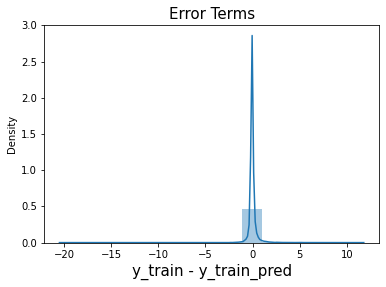

In [40]:
# Predicting y_value using traingn data of X 
y_train_pred = lr.predict(X_train_sm) 

# Creating residuals from the y_train data and predicted y_data 
res = (y_train - y_train_pred) 

# Plotting the histogram using the residual values 
fig = plt.figure() 
sns.distplot(res, bins = 15) 
plt.title('Error Terms', fontsize = 15) 
plt.xlabel('y_train - y_train_pred', fontsize = 15) 
plt.show() 

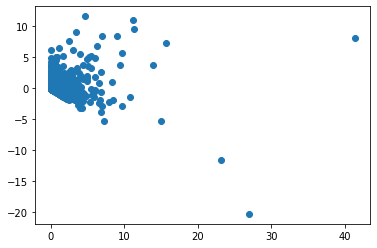

In [41]:
# Looking for any patterns in the residuals 
plt.scatter(X_train,res) 
plt.show() 

In [42]:
# Adding a constant to X_test 
X_test_sm = sm.add_constant(X_test) 
# Predicting the y values corresponding to X_test_sm 
y_test_pred = lr.predict(X_test_sm) 
# Printing the first 15 predicted values 
y_test_pred

3507     0.489891
4135     0.759978
12299    0.147782
9468     0.075758
4555     0.687955
           ...   
3080     0.940035
7209     0.381857
6986     0.381857
13125    0.147782
16480    0.075758
Length: 5016, dtype: float64

In [43]:
# Importing r2_square 
from sklearn.metrics import r2_score 
# Checking the R-squared value 
r_squared = r2_score(y_test, y_test_pred) 
r_squared 


0.8958754564780493

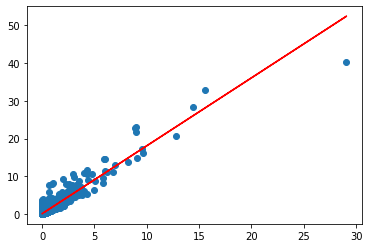

In [44]:
# Visualize the line on the test set 
plt.scatter(X_test, y_test) 
plt.plot(X_test, y_test_pred, 'r') 
plt.show() 


In [45]:
# Splitting the data into train and test 
from sklearn.model_selection import train_test_split 
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, 
train_size = 0.7, test_size = 0.3, random_state = 100) 

# Shape of the train set without adding column 
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1) 
X_test_lm = X_test_lm.values.reshape(-1,1) 
print(X_train_lm.shape) 
print(X_test_lm.shape) 

(11703, 1)
(5016, 1)


In [46]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression 
lm = LinearRegression()
 
# Fit the model using .fit() method 
lm.fit(X_train_lm, y_train_lm) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 0.0577526743682335
Slope : [1.80057691]


In [48]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8810781745009502
0.8958754564780493
